# POPULARITY OF A KEYWORD IN A SUBREDDIT

**LETS FIGURE OUT WHAT A SPECIFIC GROUP OF PEOPLE OF YOUR CHOICE THOUGHT ABOUT SOMETHING OF YOUR CHOICE WITHIN A TIME FRAME OF YOUR CHOICE !** 

**Why reddit ?**


Unlike facebook/instagram where a post has comments from a diverse crowd, reddit has subreddits where excluding some outliers, the comments/posts are mostly from people who have similar leanings, tastes and choices. 
Reddit is much more prone to group think in comparison to any other social media platform. 

Thus, in this way we can figure out what a specific group thinks about a specific person/thing/another group etc.

# PROBLEM STATEMENT : 

Calculate the fluctuatuation in popularity of our Prime Minister in the subreddit r/india and r/pakistan throughout the year 2018 and plot a graph

In [1]:
import os
import pandas as pd
import numpy as np  
import warnings
import csv
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from nltk.corpus import stopwords
import string
import nltk 
import praw 
import matplotlib.pyplot as plt
from psaw import PushshiftAPI
import os
import pandas as pd
import numpy as np  
from datetime import datetime, timezone, timedelta
from dateutil.relativedelta import relativedelta
warnings.filterwarnings("ignore")

In [2]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\levi0\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
stop = set(stopwords.words("english"))

**ADJUSTING THE TIME FRAME:** 

The time frame is adjusted such that the comments from first 25 days of every month in 2018 is calculated.

start_epoch represents the 1st day of the month.

end_epoch represents the 25th day of the month.

In [4]:
import datetime as dt

start_epoch = []
end_epoch = []

for i in range(1,13):
    se=int(dt.datetime(2018, i, 1).timestamp())
    ee=int(dt.datetime(2018, i, 25).timestamp())
    start_epoch.append(se)
    end_epoch.append(ee)

**COMMENT EXTRACTION:**

A public API, pushshift is used to extract 100 comments for each month. 

This number can be increased depending upon the internet speed and system capabilities. 

In [5]:
comments = []
api = PushshiftAPI()

for i in range(0,12):
    cmt=api.search_comments(after=start_epoch[i], before=end_epoch[i], q='Modi', subreddit='India', limit=100)
    comments.append(cmt)

**THE EXTRACTED COMMENTS ARE STORED IN A DATAFRAME:** 

To make the proprocessing and sentiment analysis simpler, the comments are stored in a dataframe.

In [6]:
corpus = pd.DataFrame()

for i in range(0,12):
    for c in comments[i]:
        temp = pd.DataFrame({'Comment Bodies': c.body}, index = [0])
        corpus = corpus.append(temp) 

**DATA PREPROCESSING & SENTIMENT ANALYSIS:** 

From the extracted comments punctuations, numbers and stopwords are removed and a separated column is created in the dataframe for the polarity score of each comment.

In [7]:
corpus = corpus.reset_index()

corpus = corpus.drop(['index'], axis=1)

corpus['Comment Bodies'] = corpus['Comment Bodies'].str.replace('[^\w\s]','')

corpus['Comment Bodies'] = corpus['Comment Bodies'].str.replace('\d+', '')

corpus['Comment Bodies'] = corpus['Comment Bodies'].apply(lambda x: [item for item in str.split(x) if item not in stop])

corpus['sentiment'] = corpus['Comment Bodies'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

In [100]:
corpus.head(5)

,Comment Bodies,sentiment
0,"[modi, made, Rahul, Gandhi, look, good, I, don...",9.251859e-18
1,"[gtThanks, waking, years, destruction, Please,...",-2.291667e-02
2,"[gtI, used, defend, BJP, lot, But, I, longer, ...",-2.500000e-01
3,"[Absolutely, I, kinda, hoped, since, Modi, amp...",1.000000e-01
4,"[This, article, adblocker, unfriendly, followi...",1.643715e-01


**CALCULATING THE MEAN POLARITY SCORE OF EVERY MONTH'S COMMENTS:**

The dataframe has 1200 polarity scores and we know that the first 100 represent january, from 100-200 represent february and so on, so we extract the 100 polarity scores for each month, calculate the mean and then store it in a list called msen.

In [8]:
msen = []
i=1
j=100

for k in range(i,j):
    cvs = corpus['sentiment'].iloc[i:j].mean()
    msen.append(cvs)
    i=i+100
    j=j+100
    if(j==1300):
        break

In [9]:
months =  ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

**PLOTTING A POPULARITY VS MONTH GRAPH FOR 2018**

Text(0.5, 1.0, "PM Modi's popularity in r/india throughout 2018")

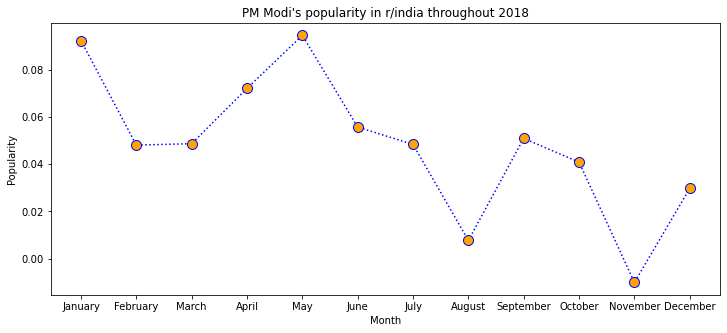

In [10]:
plt.figure(figsize=(12,5))
plt.plot(months,msen,color='blue', linestyle=':', marker='o',
         markerfacecolor='orange', markersize=10)
plt.xlabel('Month')
plt.ylabel('Popularity')
plt.title("PM Modi's popularity in r/india throughout 2018")

# **THE SAME WAS DONE FOR r/Pakistan:**
**However unlike r/india, r/pakistan in a smaller subreddit with less active members in comparison. So the number of comments per month was reduced to 10. Thus, the dataset contained only 120 comments.**

In [11]:
import datetime as dt

start_epoch = []
end_epoch = []

for i in range(1,13):
    se=int(dt.datetime(2018, i, 1).timestamp())
    ee=int(dt.datetime(2018, i, 25).timestamp())
    start_epoch.append(se)
    end_epoch.append(ee)

In [30]:
comments_pak = []
api = PushshiftAPI()

for i in range(0,12):
    cmt1=api.search_comments(after=start_epoch[i], before=end_epoch[i], q='Modi', subreddit='Pakistan', limit=10)
    comments_pak.append(cmt1)

In [33]:
corpus_pak = pd.DataFrame()

for i in range(0,12):
    for c in comments_pak[i]:
        temp1 = pd.DataFrame({'Comment Bodies': c.body}, index = [0])
        corpus_pak = corpus_pak.append(temp1) 

In [36]:
corpus_pak = corpus_pak.reset_index()

corpus_pak = corpus_pak.drop(['index'], axis=1)

corpus_pak['Comment Bodies'] = corpus_pak['Comment Bodies'].str.replace('[^\w\s]','')

corpus_pak['Comment Bodies'] = corpus_pak['Comment Bodies'].str.replace('\d+', '')

corpus_pak['Comment Bodies'] = corpus_pak['Comment Bodies'].apply(lambda x: [item for item in str.split(x) if item not in stop])

corpus_pak['sentiment'] = corpus_pak['Comment Bodies'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

In [99]:
corpus_pak.head(5)

,Comment Bodies,sentiment
0,"[Thank, Theres, tons, stuff, people, need, kno...",0.051042
1,"[Engine, repeat, Modi, innocent, titlee]",0.500000
2,"[These, people, kill, hundreds, thousands, peo...",-0.400000
3,"[This, actually, good, decision, way, things, ...",0.120000
4,"[gt, super, pamper, haha, Tbh, dont, think, mo...",0.266667


In [96]:
mpak =[]
i=0
j=10

while(i<120):
    cpak = corpus_pak['sentiment'].iloc[i:j].mean()
    mpak.append(cpak)
    i+=10
    j+=10

**PLOTTING A GRAPH TO COMPARE PM MODI'S POPULARITY IN r/India VS r/Pakistan**

Text(0.5, 1.0, 'Popularity of PM Modi in r/india(blue) and r/pakistan(green)')

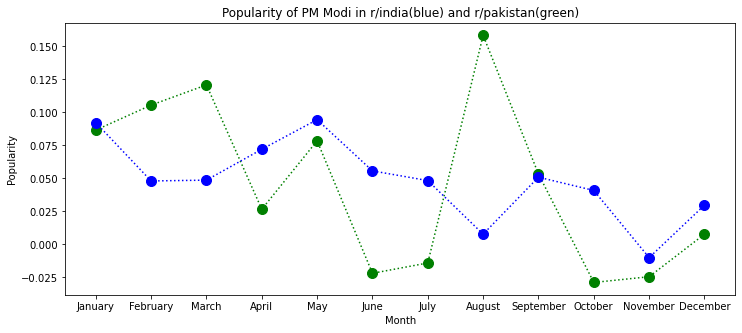

In [98]:
plt.figure(figsize=(12,5))
plt.plot(months,mpak,color='green', linestyle=':', marker='o',
         markerfacecolor='green', markersize=10)
plt.plot(months,msen,color='blue', linestyle=':', marker='o',
         markerfacecolor='blue', markersize=10)
plt.xlabel('Month')
plt.ylabel('Popularity')
plt.title("Popularity of PM Modi in r/india(blue) and r/pakistan(green)")

# CONCLUSION: 

**The graph shows a comparison in PM Modi's popularity throughout 2018 in r/india and r/pakistan. Although I feel this is not accurate due to various factors such as small dataset from r/pakistan and potential sarcasm in the comments etc. 
The scripts can be effectively used under suitable circumstances.**









# -Saket Kishore